# Boston Housing Visualization

## Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# for pretty printing
def printDf(sprkDF): 
    newdf = sprkDF.toPandas()
    from IPython.display import display, HTML
    return HTML(newdf.to_html())

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Spark libs
from pyspark.sql.session import SparkSession

# helpers
from helpers.helper_functions import translate_to_file_string

Select the Imput File

In [2]:
inputFile = translate_to_file_string("../data/Boston_Housing_Data.csv")

SparkSession creation

In [3]:
spark = (SparkSession
       .builder
       .appName("BostonHousingVisualization")
       .getOrCreate())

Create a DataFrame using an ifered schema 

In [4]:
df = spark.read.option("header", "true") \
       .option("inferSchema", "true") \
       .option("delimiter", ";") \
       .csv(inputFile)
print(df.printSchema())

root
 |-- CRIM: double (nullable = true)
 |-- ZN: double (nullable = true)
 |-- INDUS: double (nullable = true)
 |-- CHAS: integer (nullable = true)
 |-- NOX: double (nullable = true)
 |-- RM: double (nullable = true)
 |-- AGE: double (nullable = true)
 |-- DIS: double (nullable = true)
 |-- RAD: integer (nullable = true)
 |-- TAX: integer (nullable = true)
 |-- PTRATIO: double (nullable = true)
 |-- B: double (nullable = true)
 |-- LSTAT: double (nullable = true)
 |-- MEDV: double (nullable = true)
 |-- CAT: integer (nullable = true)

None


## Plot the data

In [5]:
printDf(df.summary())

,summary,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT
0,count,506,506,506,506,506,506,506,506,506,506,506,506,506,506,506
1,mean,3.6135235573122535,11.363636363636363,11.136778656126504,0.0691699604743083,0.5546950592885372,6.284634387351787,68.57490118577078,3.795042687747034,9.549407114624506,408.2371541501976,18.455533596837967,356.67403162055257,12.653063241106723,22.532806324110698,0.16600790513833993
2,stddev,8.601545105332491,23.32245299451514,6.860352940897589,0.2539940413404101,0.11587767566755584,0.7026171434153232,28.148861406903595,2.10571012662761,8.707259384239366,168.53711605495903,2.1649455237144455,91.29486438415782,7.141061511348571,9.197104087379815,0.37245595385380464
3,min,0.00632,0.0,0.46,0,0.385,3.561,2.9,1.1296,1,187,12.6,0.32,1.73,5.0,0
4,25%,0.08199,0.0,5.19,0,0.449,5.885,45.0,2.1,4,279,17.4,375.33,6.93,17.0,0
5,50%,0.25387,0.0,9.69,0,0.538,6.208,77.3,3.1992,5,330,19.0,391.43,11.34,21.2,0
6,75%,3.67822,12.5,18.1,0,0.624,6.625,94.1,5.2119,24,666,20.2,396.23,16.96,25.0,0
7,max,88.9762,100.0,27.74,1,0.871,8.78,100.0,12.1265,24,711,22.0,396.9,37.97,50.0,1


### Simple (nonsense) Plot

Saving figure attribute_xy_plots


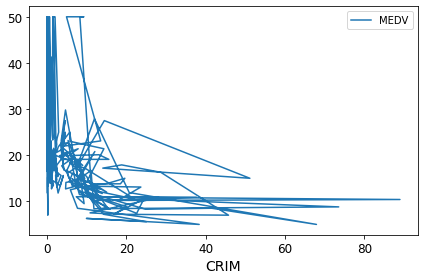

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
df.toPandas().plot(x='CRIM', y='MEDV')
save_fig("attribute_xy_plots")
plt.show()

### Box Plots

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
# TODO use the df.toPandas().boxplot() method 

### Histograms

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
# TODO use the df.toPandas().hist (...) method

### Density Plot

Saving figure attribute_density_plots


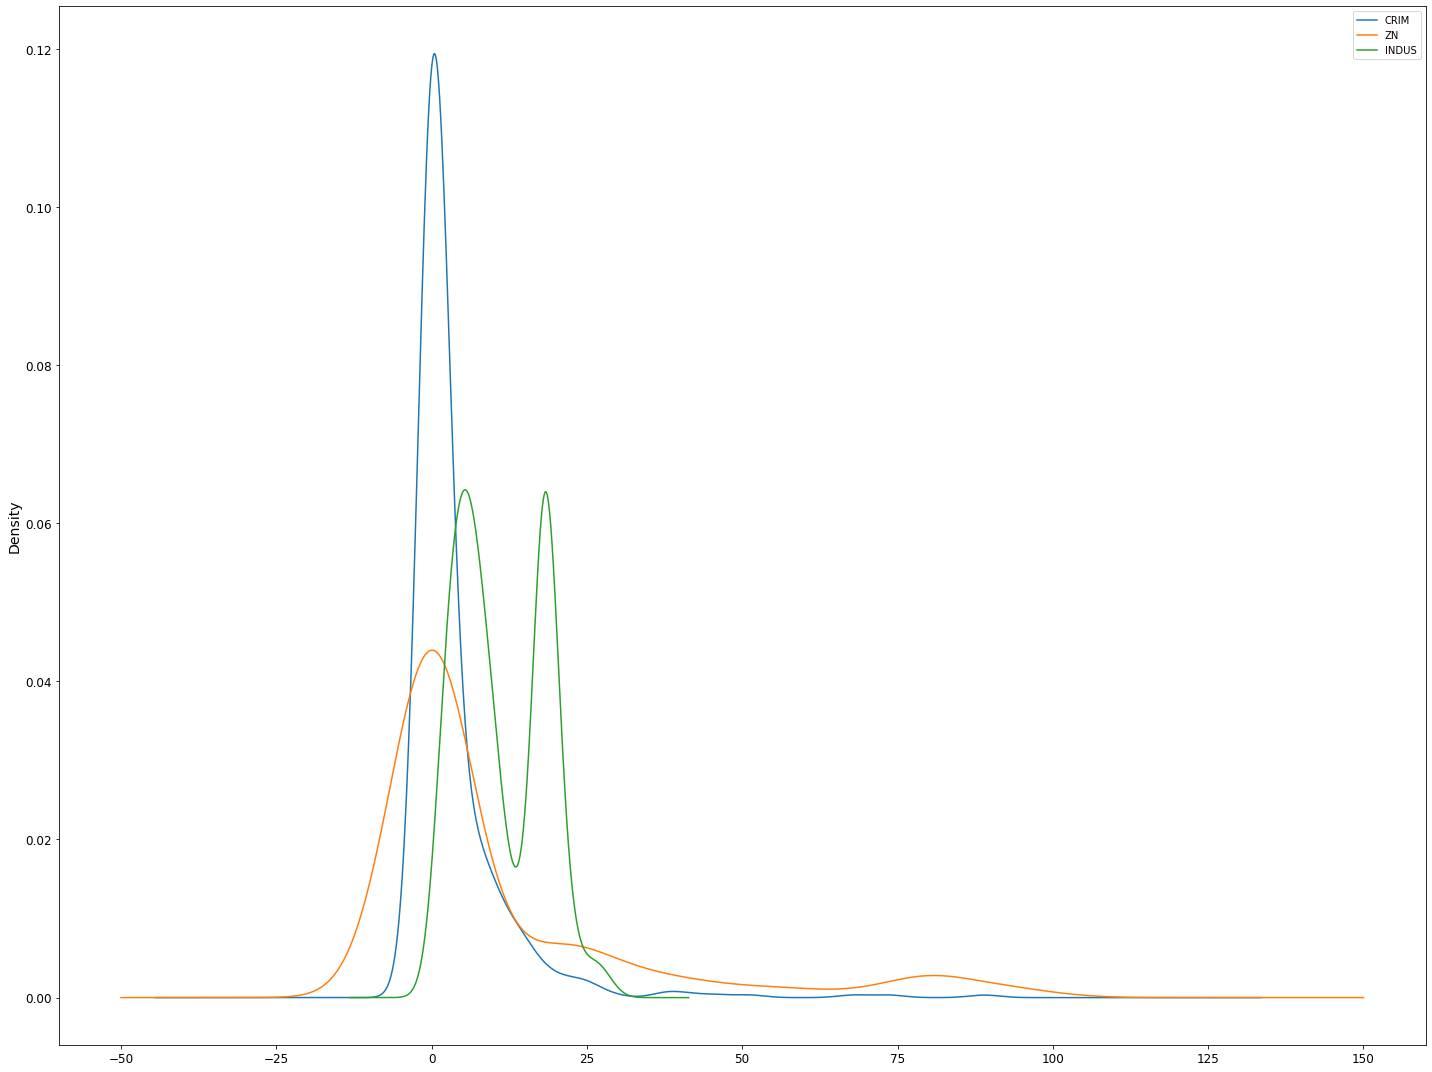

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
# TODO find usefull coordinates to show
df.select("CRIM", "ZN", "INDUS").toPandas().plot.kde(figsize=(20,15))
save_fig("attribute_density_plots")
plt.show()

### Scatter Plot

Saving figure scatter_plots


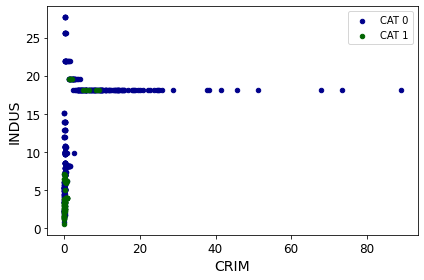

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
# TODO find usefull coordinats to plot 
ax = df.select("CRIM", "ZN", "INDUS").filter(df.CAT == 0).toPandas().plot.scatter(x='CRIM', y='INDUS', color='DarkBlue', label='CAT 0')
df.select("CRIM", "ZN", "INDUS").filter(df.CAT != 0).toPandas().plot.scatter(x='CRIM', y='INDUS', color='DarkGreen', label='CAT 1', ax=ax)
save_fig("scatter_plots")
plt.show()

### Scatter matrix

Saving figure scatter_matrix


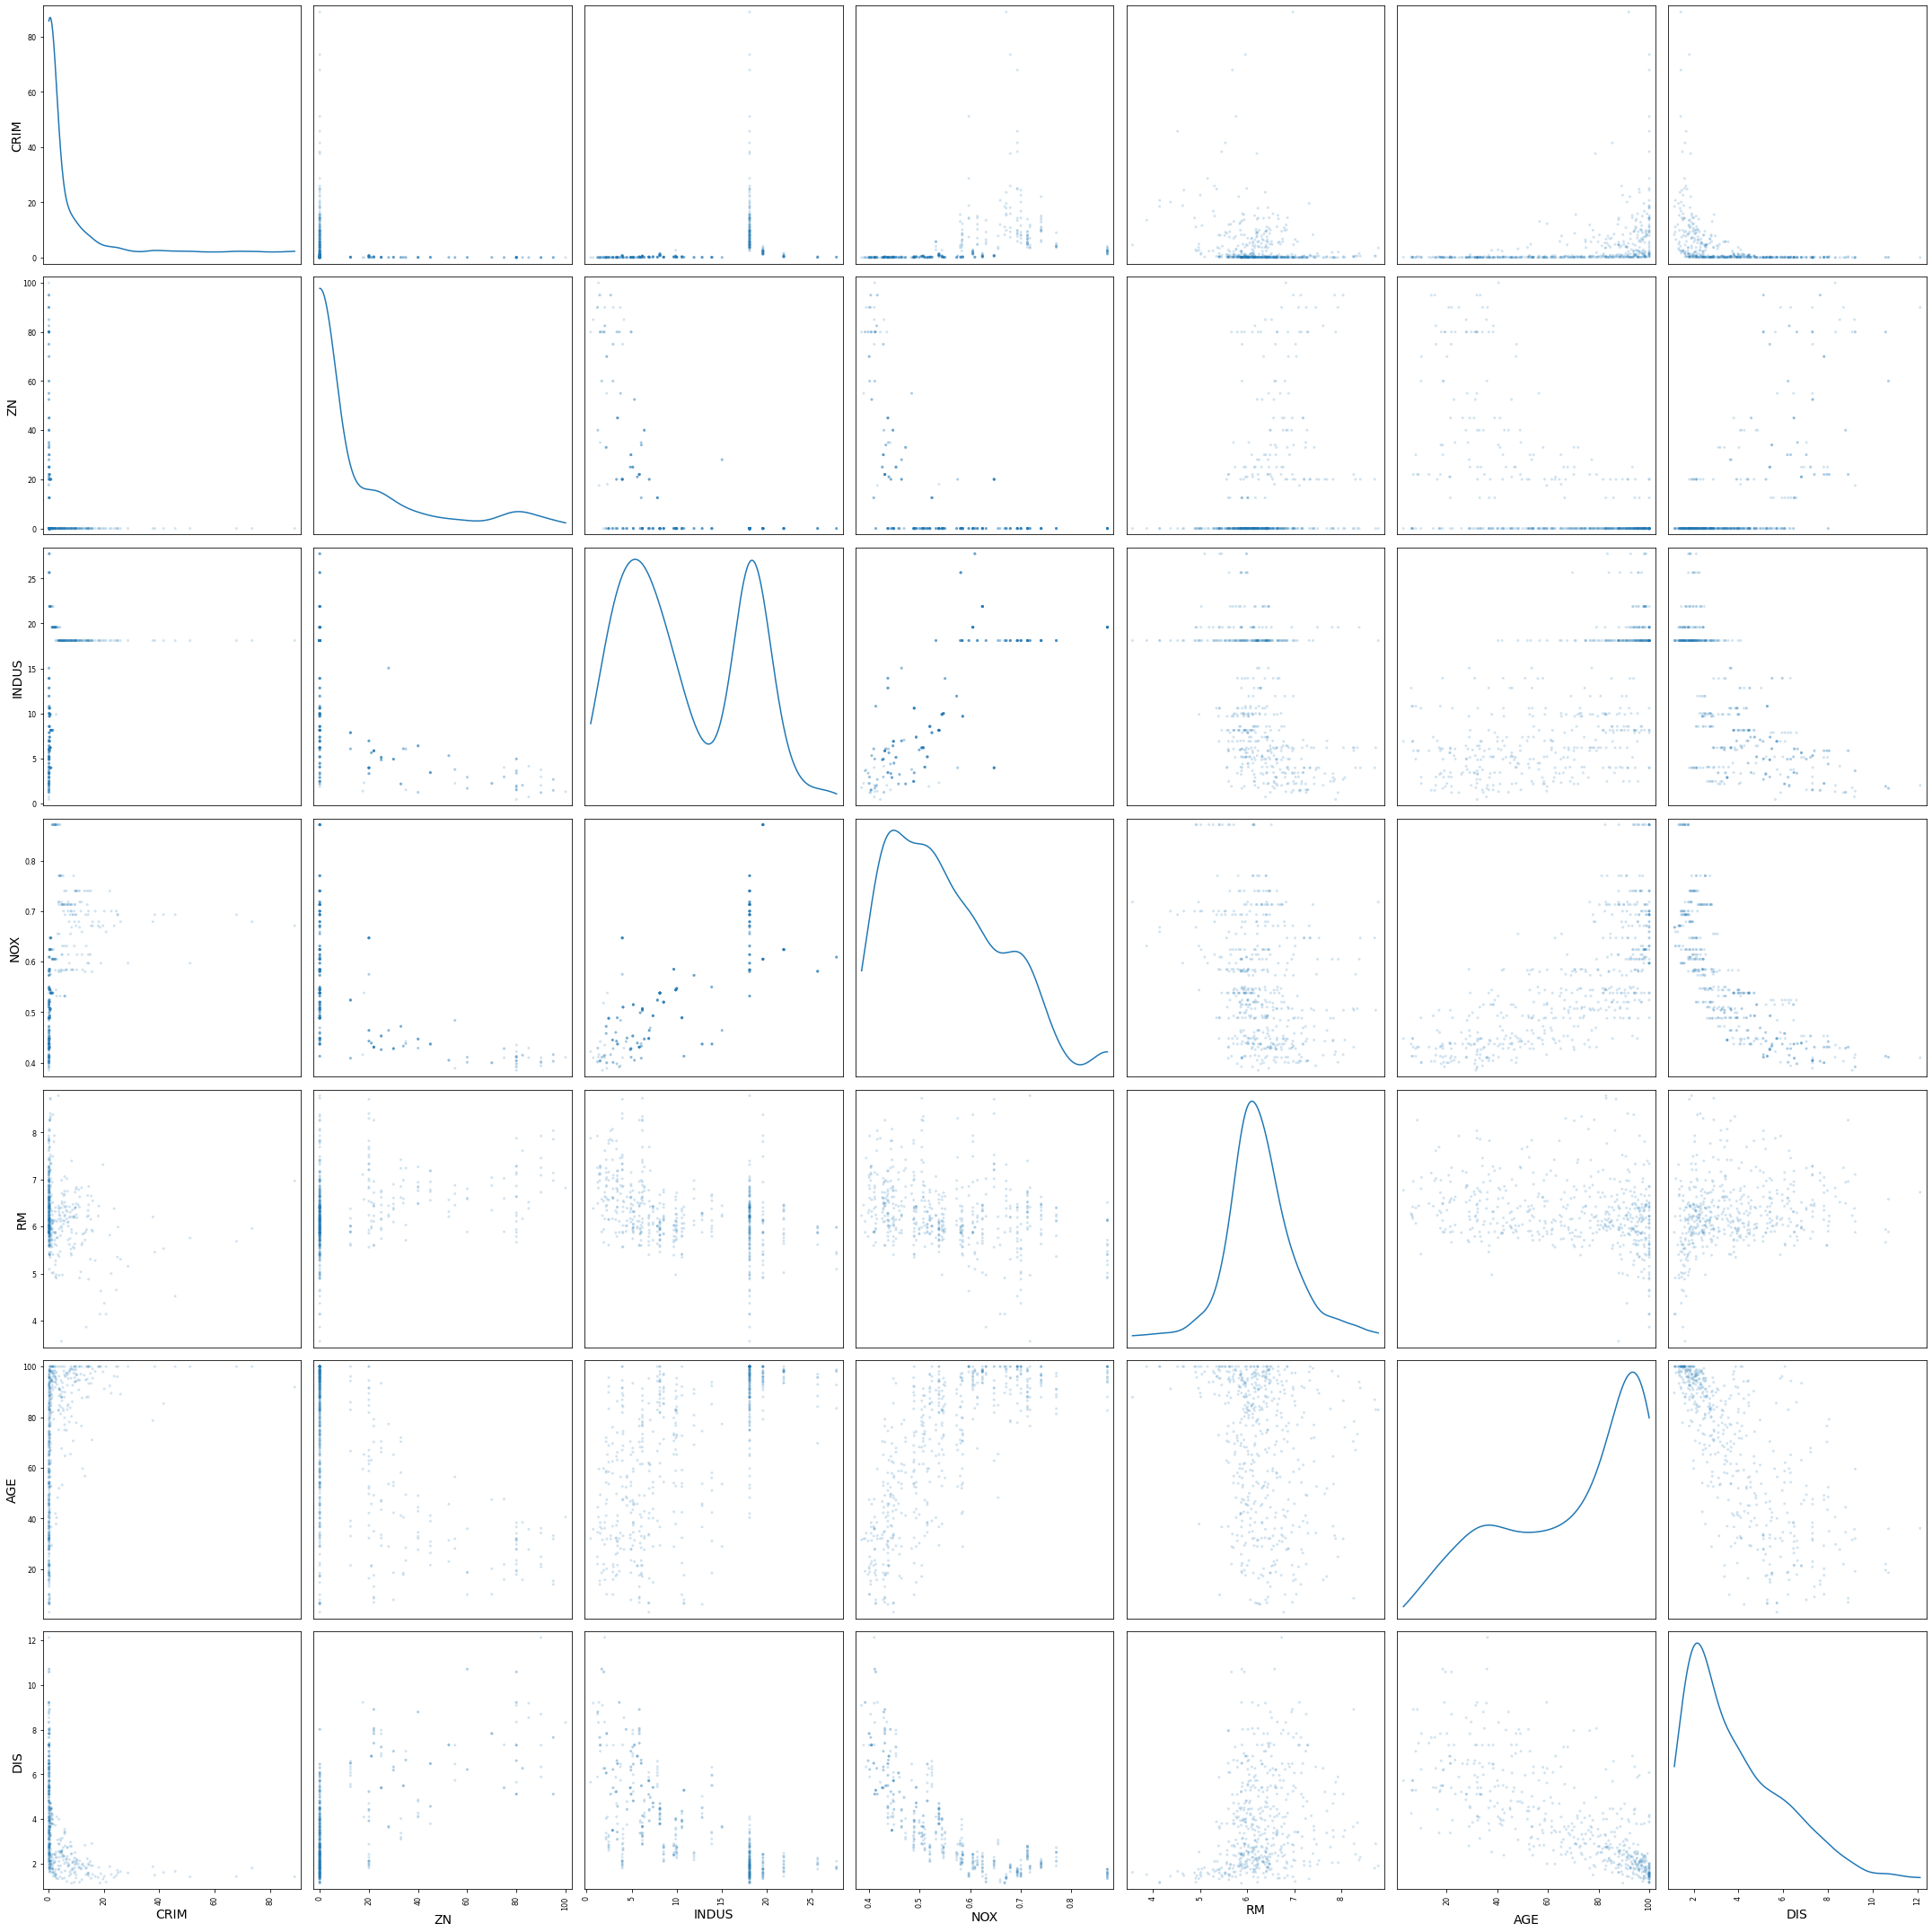

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
# TODO find usefull coordinates and test different settings
scatter_matrix(df.select("CRIM", "ZN", "INDUS","NOX","RM", "AGE", "DIS").toPandas(), alpha=0.2, figsize=(30, 30), diagonal='kde')
save_fig("scatter_matrix")
plt.show()

### Bubble Charts

Saving figure bubble_plots


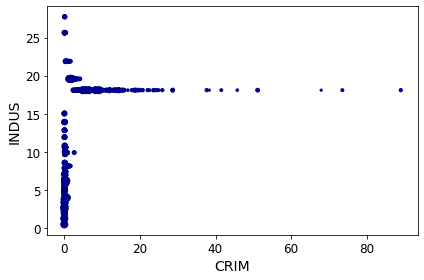

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
## TODO find usefull coordinats and test different settings
dfPandas= df.select("CRIM", "ZN", "INDUS","MEDV").toPandas()
dfPandas.plot.scatter(x='CRIM', y='INDUS', s=dfPandas['MEDV'] * 1, color='DarkBlue')
save_fig("bubble_plots")
plt.show()

### Parallel coordinates

Saving figure paralle_coordinates_plots


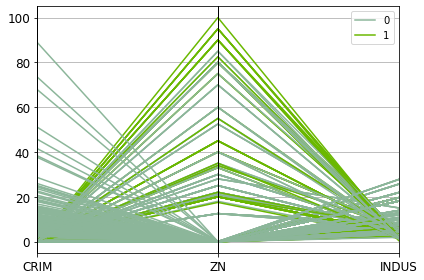

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
# TODO test different coordinates
parallel_coordinates(df.select("CRIM", "ZN", "INDUS","CAT").toPandas(), 'CAT')
save_fig("paralle_coordinates_plots")
plt.show()

In [14]:
spark.stop()